Accuracy: 0.875
Precision: 0.7727272727272727
Recall: 1.0
F1 Score: 0.8717948717948718
AUC-ROC: 0.9335038363171355
Confusion Matrix:
[[18  5]
 [ 0 17]]


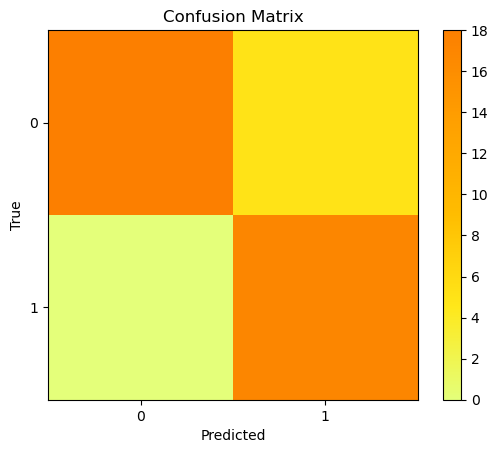

In [3]:
import pandas as pd


# Load the data
data = pd.read_csv('C:/Users/06650/Desktop/CSV/classification_dataset.csv')

# Split the data into features (X) and the target variable (y)
X = data.drop('Target', axis=1)
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (recommended for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the classifier (Logistic Regression)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])

# Display the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC:", roc_auc)

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], [0, 1])
plt.yticks([0, 1], [0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Accuracy: 0.875
Precision: 0.7727272727272727
Recall: 1.0
F1 Score: 0.8717948717948718
AUC-ROC: 0.891304347826087


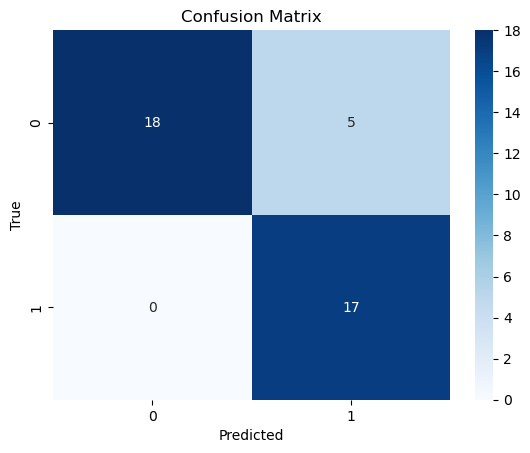

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження даних
data = pd.read_csv('C:/Users/06650/Desktop/CSV/classification_dataset.csv')

# Підготовка даних
X = data.drop('Target', axis=1)
y = data['Target']

# Розділення на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Вибір та навчання моделі (логістична регресія)
model = LogisticRegression()
model.fit(X_train, y_train)

# Передбачення на тестовому наборі
y_pred = model.predict(X_test)

# Оцінка ефективності моделі
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'AUC-ROC: {roc_auc}')

# Візуалізація матриці плутанини
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler  # Імпортуємо StandardScaler для нормалізації даних

# Завантаження даних
data = pd.read_csv('C:/Users/06650/Desktop/CSV/multiclass_dataset.csv')

# Підготовка даних
X = data.drop('Target', axis=1)
y = data['Target']

# Розділення на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормалізація даних за допомогою StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlp_model = MLPClassifier(max_iter=200)
mlp_model.fit(X_train_scaled, y_train)

# Навчання та оцінка MLP (нейронна мережа) на нормалізованих даних
mlp_model = MLPClassifier(max_iter=200)  # Збільшуємо максимальну кількість ітерацій
mlp_model.fit(X_train_scaled, y_train)
mlp_pred = mlp_model.predict(X_test_scaled)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred, average='weighted')
mlp_recall = recall_score(y_test, mlp_pred, average='weighted')
mlp_f1 = f1_score(y_test, mlp_pred, average='weighted')
mlp_conf_matrix = confusion_matrix(y_test, mlp_pred)

# Навчання та оцінка Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
print("Random Forest:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")
print(f"Confusion Matrix:\n{rf_conf_matrix}")

print("\nMLP (Neural Network):")
print(f"Accuracy: {mlp_accuracy}")
print(f"Precision: {mlp_precision}")
print(f"Recall: {mlp_recall}")
print(f"F1 Score: {mlp_f1}")
print(f"Confusion Matrix:\n{mlp_conf_matrix}")


C:\Users\06650\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\06650\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Random Forest:
Accuracy: 0.725
Precision: 0.7400030525030525
Recall: 0.725
F1 Score: 0.7146851851851851
Confusion Matrix:
[[ 4  1  2  0]
 [ 4  3  0  1]
 [ 1  0 11  2]
 [ 0  0  0 11]]

MLP (Neural Network):
Accuracy: 0.65
Precision: 0.6620337995337995
Recall: 0.65
F1 Score: 0.6428341384863124
Confusion Matrix:
[[ 4  0  3  0]
 [ 5  2  0  1]
 [ 2  1 10  1]
 [ 0  1  0 10]]


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, multilabel_confusion_matrix

# Завантаження даних для мультилейбл класифікації
data = pd.read_csv('C:/Users/06650/Desktop/CSV/multilabel_dataset.csv')

# Підготовка даних
X = data.drop(['Label1', 'Label2', 'Label3', 'Label4'], axis=1)
y = data[['Label1', 'Label2', 'Label3', 'Label4']]  # Select the label columns

# Розділення на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Навчання та оцінка багатошарової нейронної мережі (MLP) для мультилейбл класифікації
mlp_model = MLPClassifier(max_iter=1000)  # Налаштуйте параметри за потреби
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)

# Оцінка метрик для мультилейбл класифікації
accuracy = accuracy_score(y_test, mlp_pred)
precision = precision_score(y_test, mlp_pred, average='micro')
recall = recall_score(y_test, mlp_pred, average='micro')
f1 = f1_score(y_test, mlp_pred, average='micro')

# Матриця плутанини для кожного лейбла
confusion_matrices = multilabel_confusion_matrix(y_test, mlp_pred)

# Виведення результатів
print("Multi-label Classification (MLP - Neural Network):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Виведення матриць плутанини для кожного лейбла
for i in range(len(confusion_matrices)):
    label = f"Label {i}"
    print(f"Confusion Matrix for {label}:")
    print(confusion_matrices[i])



Multi-label Classification (MLP - Neural Network):
Accuracy: 0.525
Precision: 0.7792207792207793
Recall: 0.8450704225352113
F1 Score: 0.8108108108108109
Confusion Matrix for Label 0:
[[27  4]
 [ 2  7]]
Confusion Matrix for Label 1:
[[15  4]
 [ 0 21]]
Confusion Matrix for Label 2:
[[16  5]
 [ 3 16]]
Confusion Matrix for Label 3:
[[14  4]
 [ 6 16]]


C:\Users\06650\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
